In [ ]:
#using plot in the k-means clustering

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
#make_blobs is used to draw isotropic gaussian blobs
X, y = make_blobs(n_samples=300, centers=5,cluster_std=0.60, random_state=0)

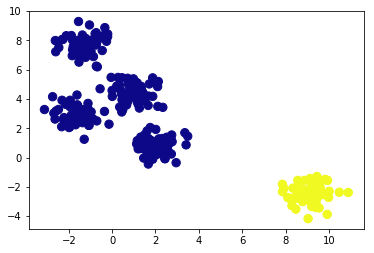

In [34]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #Randomly choose clusters
    rng = np.random.RandomState(rseed) # RandomState is initialized
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Check whether the new_centers is the same as the old center
        if np.all(centers == new_centers):
            break
        else:
            centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=70, cmap='plasma');